# Object-oriented programming

# The big reveal

So far we've been working with functions and packages of functions, as well as defining our own functions.  It turns out, though, that we've been working with objects all along, we just haven't recognize them as such. For example,

In [1]:
s = 'Hi'
s.lower()

'hi'

The string `s` is an object that we can send messages to.

In [2]:
print( type(s) )

<class 'str'>


A *class* is the blueprint for an object and is basically the name of the type, `str` in this case. An object is called an *instance* of the class.

In `s.lower()` we are sending the `lower` message to the `s` string object. Messages are really just functions associated with classes/objects.

In [3]:
s.lower

<function str.lower>

In a language that does not support object learning programming, we would do something like:

```python
lower(s)
```

Python has both functions and object reprogramming which is why there is both `s.lower()` and:

In [4]:
len(s)

2

The choice of function or "message" is up to the library designer.

In terms of implementation, however, `s.lower()` is actually implemented as `lower(s)`. Computer processors understand function calls; they do not understand objects and so we performed this translation within the Python interpreter itself.

# Package vs object members

Let's get another thing straight. The dot `.` operator is overloaded in Python to mean both package member and object member access.  You are familiar with this already:

In [5]:
import numpy as np
np.array([1,2,3])

array([1, 2, 3])

In [6]:
import math
math.log(3000)

8.006367567650246

This is a common point of confusion when reading code. When we see `a.f()`, we don't know whether that function `f` is a member of the package identified by `a` or an object referred to by `a`.

In the wordsim project, you defined a file called `wordsim.py` and then my `test_wordsim.py` file did `from wordsim import *` to pull in all your functions in `wordsim.py`.

# Fields versus methods

Objects have functions, which we call *methods* to distinguish them from functions not associated with objects. Objects also have variables, which we call *fields*.  We've also been using fields all along, such as `df.columns` that gets the list of columns in a data frame.

In [7]:
import datetime
now = datetime.date.today()
print( type(now) )
print( now.year ) # access field year

<class 'datetime.date'>
2018


If you try to access an objects function without the parentheses, the expression evaluates to the function object itself instead of calling it:

In [8]:
s='hi'
s.title

<function str.title>

# A simple object

The fields of an object are the data items we want to associate together. For example, if I want to track book titles/authors, I can use a list of tuples:

In [9]:
books = [
    ('Gridlinked', 'Neal Asher'),
    ('Startide Rising', 'David Brin')
]

for b in books:
    print(f"{b[1]}: {b[0]}")

Neal Asher: Gridlinked
David Brin: Startide Rising


In [10]:
# Or, more fancy
for title, author in books:
    print(f"{author}: {title}")

Neal Asher: Gridlinked
David Brin: Startide Rising


To access the elements of the tuple in both cases, we have to keep track of the order in our heads. In other words, we have to access the tuple elements like they are list elements, which they are. A better way is to formally declare that author and title data elements should be encapsulated into a single entity called a book. Python has what I consider an extremely quirky specification but it is extremely flexible. Let's take a look at our first class definition that contains a function called a *constructor*.

In [11]:
class Book:
    def __init__(self, title, author):
        self.title = title
        self.author = author

The constructor typically sets initial and default field values based upon the arguments.

All methods, functions defined within an object, must have an explicit first argument called `self`.  This is the object under consideration.

Then we can make a list of book objects or instances of class `Book`:

In [12]:
books = [
    Book('Gridlinked', 'Neal Asher'),
    Book('Startide Rising', 'David Brin')
]

for b in books:
    print(f"{b.author}: {b.title}") # access fields

Neal Asher: Gridlinked
David Brin: Startide Rising


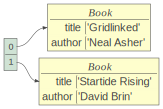

In [22]:
from lolviz import *

objviz(books)

Notice that we do not pass the `self` parameter to the constructor. **It's implicit at the call site but explicit at the definition site!**

# Defining methods

If you try to print out a book you will see just the type information and the physical memory address:

In [18]:
print(books[0])

Book(Gridlinked, Neal Asher)


In [21]:
class Book:
    def __init__(self, title, author):
        self.title = title
        self.author = author
        
    def __str__(self): # called when conversion to string needed like print
        return f"Book({self.title}, {self.author})"
    
    def __repr__(self): # called in interactive mode
        return self.__str__() # call the string
    
books = [
    Book('Gridlinked', 'Neal Asher'),
    Book('Startide Rising', 'David Brin')
]

print(books[0]) # calls __str__()
books[0]        # calls __repr__()

Book(Gridlinked, Neal Asher)


Book(Gridlinked, Neal Asher)

Let's create another method that sets the count of book sold.

In [30]:
class Book:
    def __init__(self, title, author):
        self.title = title
        self.author = author
        self.sold = 0 # set default
        
    def sell(self, n):
        self.sold += n
        
    def __str__(self): # called when conversion to string needed like print
        return f"Book({self.title}, {self.author}, sold={self.sold})"
    
    def __repr__(self): # called in interactive mode
        return self.__str__() # call the string

In [32]:
b = Book('Gridlinked', 'Neal Asher')
print(b)
b.sell(100)
print(b)

Book(Gridlinked, Neal Asher, sold=0)
Book(Gridlinked, Neal Asher, sold=100)


## The key to understanding methods versus functions

`b.sell(100)` is translated and executed by the Python interpreter as `sell(b,100)`. `b` becomes parameter `self` and so the `sell()` function is updating book `b`.

## Exercise

Define a class called `Point` that has a constructor taking x, y coordinates and make them fields of the class.

Define method `distance(q)` that takes a `Point` and returns the Euclidean distance (`np.linalg.norm()`) from `self` to `q`.

Test with

```
p = Point(3,4)
q = Point(5,6)
print(p.distance(q))
```

Add method `__str__` so that `print(q)` prints something nice like `(3,4)`.

### Solution

In [25]:
import numpy as np

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def distance(self, other):
        return np.sqrt( (self.x - other.x)**2 + (self.y - other.y)**2 )
    
    def __str__(self):
        return f"({self.x},{self.y})"

In [28]:
p = Point(3,4)
q = Point(5,6)
print(p, q)
print(p.distance(q))

(3,4) (5,6)
2.8284271247461903


# Inheritance

# Rationale

Because the mind of a hunter-gatherer views the world as a collection
of objects that interact by sending messages, an OO programming paradigm
maps well to the real world problems we try to simulate via computer.
Further, we are at our best when programming the way our minds are
hardwired to think.

Because we can specify how differently-typed objects are similar,
we can define new objects as they differ from existing objects.
By correctly relating similar classes by their category/commonality/
similarity, code reuse occurs as a side-effect of inheritance.

Non-OO languages are inflexible/brittle because the exact type
of variables must be specified.  In OO languages, *polymorphism* is the ability to refer to groups of similar but different types using a single type reference.